In [2]:
%matplotlib inline
import networkx as nx;
import matplotlib.pyplot as plt;
import warnings
import community

warnings.filterwarnings("ignore")

G = nx.Graph()

G = nx.read_edgelist("facebook_combined.txt")

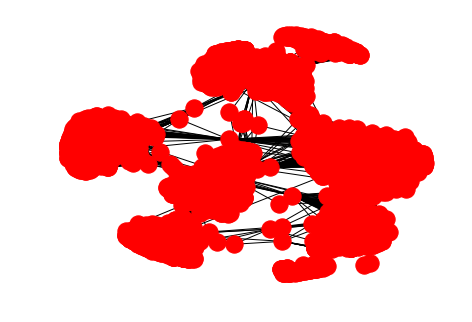

In [4]:
nx.draw(G)


In [29]:
nx.density(G)

0.010809377151523615

In [30]:
#clustering coefficient
#clustering
nx.average_clustering(G)


0.6052470172003288

In [32]:
part = community.best_partition(G) # Compute the partition of the graph nodes which maximises the modularity (or try..) using the Louvain heuristices
print(community.modularity(part, G))

0.834921929357


In [4]:
dendrogram = community.generate_dendrogram(G)
for level in range(len(dendrogram) - 1) :
    print("partition at level", level, "is", community.partition_at_level(dendrogram, level))

('partition at level', 0, 'is', {u'2031': 0, u'4026': 1, u'3724': 2, u'4024': 1, u'4025': 3, u'4022': 1, u'4023': 1, u'4020': 1, u'4021': 1, u'643': 4, u'4028': 1, u'4029': 5, u'344': 7, u'345': 7, u'346': 8, u'347': 7, u'340': 7, u'341': 7, u'342': 7, u'343': 9, u'3997': 1, u'3996': 1, u'3995': 1, u'3994': 1, u'348': 10, u'349': 10, u'3991': 1, u'3990': 3, u'1511': 45, u'1296': 12, u'2318': 0, u'2319': 0, u'2316': 13, u'2317': 13, u'2314': 13, u'2315': 0, u'2312': 0, u'2313': 13, u'2310': 0, u'2311': 14, u'298': 7, u'299': 8, u'296': 15, u'297': 7, u'294': 7, u'295': 7, u'292': 7, u'293': 16, u'290': 7, u'291': 7, u'3773': 17, u'3772': 18, u'3771': 19, u'3770': 2, u'3777': 2, u'3776': 20, u'3775': 18, u'3774': 21, u'2147': 14, u'3779': 18, u'3778': 17, u'270': 7, u'271': 7, u'272': 7, u'273': 22, u'274': 7, u'275': 22, u'276': 7, u'277': 7, u'278': 15, u'279': 9, u'3211': 6, u'2146': 13, u'581': 23, u'2268': 0, u'2269': 0, u'2262': 14, u'2263': 24, u'2260': 13, u'2261': 14, u'2266': 1

In [5]:
len(dendrogram)

3

In [13]:
part2 = community.partition_at_level(dendrogram, 0)
part3 = community.partition_at_level(dendrogram, 1)
part4 = community.partition_at_level(dendrogram, 2)

In [11]:
print(community.modularity(part2, G))

0.814211681369


In [12]:
print(community.modularity(part3, G))

0.834893698236


In [14]:
print(community.modularity(part4, G))

0.834921929357


In [17]:
ind1 = community.induced_graph(part2, G) #induced graph from smallest partition


nx.average_clustering(ind1)

0.5573499850409669

In [18]:
ind2 = community.induced_graph(part3, G) #induced graph from mid size partition


nx.average_clustering(ind2)

0.520326278659612

In [19]:
ind3 = community.induced_graph(part4, G) #induced graph from largest partition


nx.average_clustering(ind3)

0.5584033613445377

In [20]:
len(ind1.edges())

306

In [21]:
len(ind2.edges())

54

In [22]:
len(ind3.edges())

52

In [23]:
len(ind1.nodes())

92

In [24]:
len(ind2.nodes())

18

In [25]:
len(ind3.nodes())

17

In [26]:
subgraphs = list(nx.connected_component_subgraphs(G))


In [27]:
len(subgraphs)

2

In [28]:
len(subgraphs[0].edges())

88234

In [29]:
len(subgraphs[1].edges())

1

In [32]:
len(G.edges())

88235

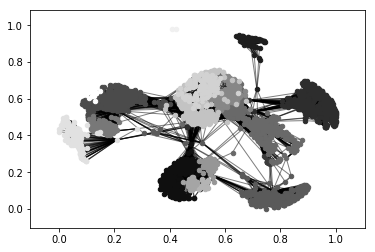

In [33]:
size = float(len(set(part.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(part.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in part.keys()
                                if part[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

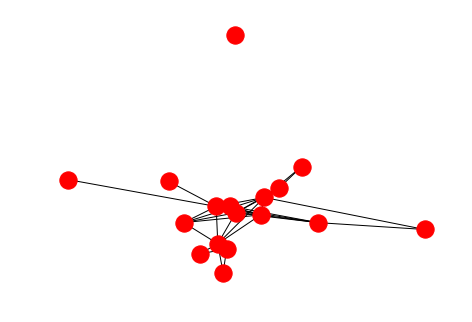

In [34]:
nx.draw(ind3)

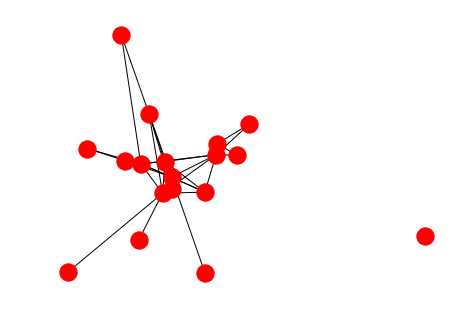

In [35]:
nx.draw(ind2)

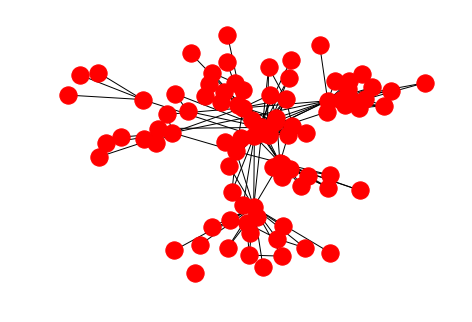

In [37]:
nx.draw(ind1)

In [39]:
list(nx.community.k_clique_communities(ind1,5))


[frozenset({0, 6, 10, 12, 18, 30, 31, 41, 42, 45, 47, 48, 49, 61, 73, 74, 76}),
 frozenset({2, 17, 18, 20, 21, 55}),
 frozenset({2, 18, 19, 34, 57})]

In [40]:
list(nx.community.k_clique_communities(ind2,5))


[frozenset({2, 6, 8, 12, 14}), frozenset({0, 4, 5, 6, 12, 14})]

In [41]:
list(nx.community.k_clique_communities(ind3,5))


[frozenset({0, 4, 5, 6, 12, 13}), frozenset({2, 6, 8, 12, 13})]

In [ ]:
list(nx.community.k_clique_communities(G,5))


In [3]:
parts = community.best_partition(G)
values = [parts.get(node) for node in G.nodes()]

print values


[16, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 6, 9, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 1, 1, 6, 6, 1, 1, 4, 0, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 0, 6, 0, 0, 9, 0, 0, 9, 9, 0, 0, 0, 9, 9, 0, 0, 9, 10, 11, 0, 0, 9, 5, 5, 5, 5, 5, 5, 5, 12, 5, 5, 9, 0, 9, 9, 0, 9, 9, 0, 4, 0, 0, 4, 4, 4, 4, 2, 2, 7, 2, 2, 2, 2, 2, 4, 2, 2, 4, 7, 0, 4, 4, 4, 4, 7, 7, 4, 7, 4, 1, 7, 2, 1, 4, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 12, 12, 12, 12, 12, 12, 6, 8, 10, 10, 13, 8, 4, 4, 4, 4, 4, 7, 4, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 4, 2, 4, 12, 12, 7, 4, 12, 8, 13, 8, 12, 12, 13, 12, 8, 4, 12, 8, 8, 12, 12, 12, 8, 12, 13, 8, 12, 13, 12, 12, 12, 8, 6, 13, 6, 4, 6, 2, 6, 6, 0, 12, 8, 12, 8, 8, 12, 12, 8, 6, 14, 12, 12, 6, 7, 13, 8, 14, 6, 4, 8, 12, 12, 12, 0, 8, 8, 6, 6, 7, 4, 6, 4, 6, 14, 7, 6, 7, 3, 14, 6, 9, 6, 0, 6, 0, 13, 12, 8, 6, 12, 6, 12, 12, 8, 13, 6, 6, 6, 2, 2, 2, 6, 2, 0, 2, 2, 2, 6, 10, 0, 2, 2, 6, 1, 7, 1, 1, 

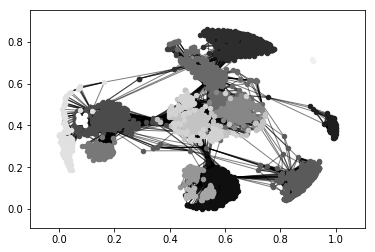

In [4]:
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

In [5]:
for key, value in partition.iteritems() :
    print key, value

2031 0
4026 1
3724 2
4024 1
4025 1
4022 1
4023 1
4020 1
4021 1
643 3
4028 1
4029 1
344 5
345 5
346 5
347 5
340 5
341 5
342 5
343 5
3997 1
3996 1
3995 1
3994 1
348 6
349 6
3991 1
3990 1
1511 13
1296 8
2318 0
2319 0
2316 0
2317 0
2314 0
2315 0
2312 0
2313 0
2310 0
2311 9
298 5
299 5
296 5
297 5
294 5
295 5
292 5
293 5
290 5
291 5
3773 2
3772 2
3771 2
3770 2
3777 2
3776 2
3775 2
3774 2
2147 9
3779 2
3778 2
270 5
271 5
272 5
273 5
274 5
275 5
276 5
277 5
278 5
279 5
3211 4
2146 0
581 6
2268 0
2269 0
2262 9
2263 0
2260 0
2261 9
2266 9
2267 0
2264 0
2265 0
2442 9
2443 9
2440 0
2441 0
2446 9
2447 10
2444 11
2445 0
2448 0
2449 9
108 5
109 5
102 5
103 5
100 5
101 5
106 5
107 12
104 5
105 5
2046 9
2047 0
2044 9
2045 9
2042 0
2043 9
2040 9
2041 0
3198 4
1297 6
2048 0
2049 0
3155 4
3154 4
2038 0
3159 4
3597 2
3519 2
3518 2
3513 2
3512 2
3511 2
3510 2
3517 2
3516 2
3515 2
3514 2
2688 4
2689 7
2684 4
2685 4
2686 4
2687 4
2680 7
2681 7
2682 4
2683 7
3391 4
3999 1
3390 7
3998 1
3393 4
99 5
98 5
3392 7

3731 2
680 6
3917 2
3916 2
3915 2
3914 2
3913 2
3912 2
3911 2
3910 2
3919 2
3918 2
1636 8
2918 4
216 5
217 5
214 5
215 5
212 5
213 5
210 5
211 5
218 5
219 5
578 3
3094 4
788 14
2139 9
462 6
4 5
3145 4
3073 7
3489 2
3488 2
3481 2
3480 2
3483 2
3482 2
3485 2
3484 2
3487 2
3486 2
938 13
2474 0
3649 2
3648 2
3647 2
3646 2
3645 2
3644 2
3643 2
3642 2
3641 2
3640 2
2550 9
3005 4
2552 9
2553 9
2554 9
2555 0
2556 9
3004 7
2558 0
2559 9
3007 4
2396 0
2397 0
2394 0
63 5
2392 9
2393 9
2390 0
2391 9
3001 4
2398 0
2399 0
2778 4
2779 4
3003 5
2649 0
2770 4
2771 4
2772 4
67 5
2774 4
2775 4
2776 4
2777 7
3166 7
3167 4
3940 2
2800 7
1858 12
1859 8
2801 4
1850 8
1851 12
1852 12
1853 6
1854 12
1855 8
1856 12
1857 8
2172 9
2173 0
2170 11
2171 10
919 8
918 12
2174 0
2175 0
915 6
914 6
917 8
916 12
911 12
910 6
913 8
912 6
2604 9
2605 0
2606 9
2607 9
2600 9
2601 9
2602 9
2603 0
2608 0
2609 0
3261 4
1932 0
3263 4
3262 4
3265 4
3264 4
3267 4
3266 4
3269 7
3268 4
1939 0
1938 9
458 6
3369 4
847 14
846 14
3465 2

468 6
1353 13
1352 12
1351 12
466 6
1357 6
1356 6
1355 8
1200 6
1273 8
937 8
2159 10
1519 12
1518 12
1515 8
1514 6
1517 12
1516 12
1274 13
1510 8
1513 12
1512 6
959 12
3439 2
3395 4
1275 8
1004 12
958 13
1798 13
3129 7
3184 7
3185 4
3186 4
3187 4
3180 4
3181 4
3182 4
3183 4
1532 12
3188 4
3189 4
3214 4
1896 13
3397 4
582 3
3109 4
4019 1
4018 1
2112 9
48 5
4013 1
4012 1
4011 1
3783 2
1897 6
4016 1
4015 1
4014 1
357 6
356 6
355 6
354 6
353 6
352 6
351 6
350 6
3984 1
3985 1
3986 1
3987 1
3980 1
3981 1
359 6
358 6
3107 4
3612 2
43 5
3613 2
2323 9
1111 13
2321 0
2320 11
2327 0
2326 9
2325 0
1446 6
3234 7
2329 9
2328 0
1113 6
289 5
288 5
1112 12
2830 4
3619 2
281 5
1443 6
283 5
282 5
285 5
284 5
287 5
1442 12
3760 2
3761 2
3762 2
3763 2
3764 2
1441 12
3766 2
3767 2
3768 2
3769 2
1116 12
263 5
262 5
261 5
260 5
267 5
266 5
265 5
264 5
286 5
269 5
268 5
1562 13
2499 9
2498 0
1563 12
1893 8
2491 0
2490 11
3595 2
2492 9
2495 9
2494 10
2497 0
2496 0
2193 0
1294 6
2259 0
2258 9
2257 9
2256 0
2255 

In [10]:
from collections import defaultdict
new_part = defaultdict(list)
for k, v in partition.iteritems():
    new_part[v].append(k)



In [12]:
print len(new_part)

17


In [13]:
for k in sorted(new_part, key=lambda k: len(new_part[k]), reverse=True):
    print k

2
4
6
12
0
5
8
9
7
14
13
10
1
3
11
16
15


In [15]:
for k in new_part:
    print k, new_part[k]

0 [u'2031', u'2318', u'2319', u'2316', u'2317', u'2314', u'2315', u'2312', u'2313', u'2310', u'2146', u'2268', u'2269', u'2263', u'2260', u'2267', u'2264', u'2265', u'2440', u'2441', u'2445', u'2448', u'2047', u'2042', u'2041', u'2048', u'2049', u'2038', u'1990', u'1577', u'2036', u'2035', u'2301', u'2302', u'2305', u'2304', u'2274', u'2277', u'2270', u'2273', u'2272', u'2279', u'2458', u'2455', u'2457', u'2456', u'2451', u'2450', u'2453', u'2452', u'2051', u'2053', u'2052', u'2054', u'2057', u'2153', u'1982', u'1945', u'2191', u'2194', u'2195', u'2196', u'2197', u'2198', u'2203', u'2204', u'2205', u'2208', u'2209', u'2420', u'2421', u'2422', u'2424', u'2518', u'2519', u'2514', u'2516', u'2517', u'2510', u'2511', u'2512', u'1978', u'1975', u'1970', u'2183', u'2182', u'2181', u'2180', u'2187', u'2186', u'2189', u'2211', u'2217', u'2215', u'2214', u'2219', u'2431', u'2437', u'2436', u'2434', u'2509', u'2508', u'2505', u'2503', u'2502', u'2501', u'2199', u'1948', u'1949', u'1940', u'1941'

In [18]:
first_part = []
for k in partition:
    if partition[k] == 2:
        first_part.append(k)


In [19]:
print first_part

[u'3724', u'3773', u'3772', u'3771', u'3770', u'3777', u'3776', u'3775', u'3774', u'3779', u'3778', u'3597', u'3519', u'3518', u'3513', u'3512', u'3511', u'3510', u'3517', u'3516', u'3515', u'3514', u'3834', u'3835', u'3836', u'3837', u'3830', u'3831', u'3832', u'3833', u'3971', u'3838', u'3839', u'3593', u'3592', u'3748', u'3749', u'3746', u'3747', u'3744', u'3745', u'3742', u'3743', u'3740', u'3741', u'3591', u'3692', u'3693', u'3694', u'3695', u'3696', u'3697', u'3596', u'3526', u'3527', u'3524', u'3525', u'3522', u'3523', u'3520', u'3521', u'3528', u'3529', u'3594', u'3650', u'3953', u'3885', u'3827', u'3826', u'3825', u'3824', u'3823', u'3822', u'3821', u'3820', u'3582', u'3829', u'3828', u'3583', u'3588', u'3759', u'3758', u'3751', u'3750', u'3753', u'3752', u'3755', u'3754', u'3757', u'3756', u'3689', u'3688', u'3683', u'3682', u'3681', u'3680', u'3687', u'3686', u'3685', u'3684', u'3531', u'3530', u'3533', u'3532', u'3535', u'3534', u'3537', u'3536', u'3539', u'3538', u'3589', 

In [21]:
first_induced_graph = G.subgraph(first_part)

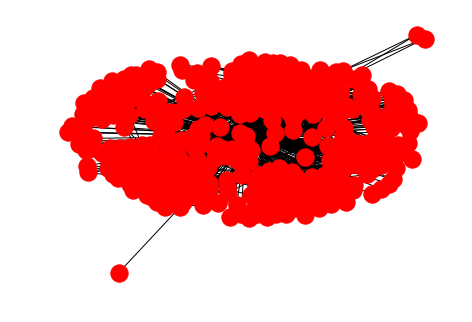

In [22]:
nx.draw(first_induced_graph)

In [44]:
second_part = []
for k in partition:
    if partition[k] == 4:
        second_part.append(k)
second_induced_graph = G.subgraph(second_part)

In [61]:
third_part = []
for k in partition:
    if partition[k] == 6:
        third_part.append(k)
third_induced_graph = G.subgraph(third_part)

In [40]:
part1_1 = community.best_partition(first_induced_graph) # Compute the partition of the graph nodes which maximises the modularity (or try..) using the Louvain heuristices
print(community.modularity(part1_1, first_induced_graph))

0.620699441024


In [48]:
part2_1 = community.best_partition(second_induced_graph) # Compute the partition of the graph nodes which maximises the modularity (or try..) using the Louvain heuristices
print(community.modularity(part2_1, second_induced_graph))

0.403061418552


In [49]:
part3_1 = community.best_partition(third_induced_graph) # Compute the partition of the graph nodes which maximises the modularity (or try..) using the Louvain heuristices
print(community.modularity(part3_1, third_induced_graph))

0.491851737295


In [80]:
list(nx.community.k_clique_communities(first_induced_graph,17))

[frozenset({u'3437',
            u'3488',
            u'3514',
            u'3518',
            u'3528',
            u'3545',
            u'3557',
            u'3596',
            u'3604',
            u'3605',
            u'3611',
            u'3640',
            u'3687',
            u'3702',
            u'3737',
            u'3790',
            u'3800',
            u'3804',
            u'3824',
            u'3838',
            u'3858',
            u'3860',
            u'3938'}),
 frozenset({u'3437',
            u'3448',
            u'3449',
            u'3456',
            u'3501',
            u'3545',
            u'3577',
            u'3586',
            u'3596',
            u'3604',
            u'3633',
            u'3674',
            u'3677',
            u'3692',
            u'3693',
            u'3734',
            u'3756',
            u'3800',
            u'3841',
            u'3851',
            u'3938',
            u'3948'})]

In [66]:
list(nx.community.k_clique_communities(third_induced_graph,20))

[]

In [78]:
list(nx.community.k_clique_communities(second_induced_graph,23))

[frozenset({u'1684',
            u'2661',
            u'2674',
            u'2719',
            u'2742',
            u'2765',
            u'2770',
            u'2778',
            u'2781',
            u'2793',
            u'2828',
            u'2833',
            u'2849',
            u'2853',
            u'2863',
            u'2869',
            u'2939',
            u'2970',
            u'2973',
            u'2991',
            u'3021',
            u'3035',
            u'3049',
            u'3070',
            u'3082',
            u'3101',
            u'3102',
            u'3113',
            u'3115',
            u'3116',
            u'3120',
            u'3132',
            u'3146',
            u'3150',
            u'3152',
            u'3169',
            u'3201',
            u'3206',
            u'3239',
            u'3247',
            u'3252',
            u'3265',
            u'3267',
            u'3277',
            u'3280',
            u'3291',
            u'3297',
            u

In [71]:
print [l for l in nx.find_cliques(first_induced_graph)]

[[u'868', u'857', u'862', u'865'], [u'3437', u'3922', u'3536'], [u'3437', u'3923', u'3720', u'3751', u'3789', u'3749'], [u'3437', u'3923', u'3720', u'3751', u'3787'], [u'3437', u'3923', u'3720', u'3918', u'3789', u'3749'], [u'3437', u'3920', u'3587', u'3500', u'3933', u'3776', u'3747', u'3791', u'3478', u'3964', u'3967', u'3655'], [u'3437', u'3920', u'3587', u'3500', u'3933', u'3776', u'3747', u'3791', u'3478', u'3960', u'3655', u'3696', u'3783'], [u'3437', u'3920', u'3587', u'3500', u'3933', u'3776', u'3747', u'3791', u'3478', u'3960', u'3655', u'3696', u'3967'], [u'3437', u'3920', u'3587', u'3500', u'3933', u'3776', u'3747', u'3791', u'3478', u'3960', u'3809', u'3783'], [u'3437', u'3920', u'3587', u'3500', u'3933', u'3641', u'3967', u'3655', u'3960', u'3696'], [u'3437', u'3921', u'3599', u'3666', u'3629', u'3636', u'3590', u'3728', u'3710'], [u'3437', u'3921', u'3599', u'3615', u'3867', u'3740', u'3907', u'3629', u'3835', u'3636', u'3590', u'3815'], [u'3437', u'3921', u'3599', u'3615

In [75]:
sorted(list(nx.find_cliques(first_induced_graph)), key=len, reverse=True)

[[u'3437',
  u'3557',
  u'3596',
  u'3640',
  u'3790',
  u'3804',
  u'3824',
  u'3488',
  u'3545',
  u'3528',
  u'3518',
  u'3737',
  u'3938',
  u'3611',
  u'3514',
  u'3860',
  u'3838'],
 [u'3437',
  u'3557',
  u'3596',
  u'3640',
  u'3790',
  u'3804',
  u'3824',
  u'3488',
  u'3545',
  u'3528',
  u'3518',
  u'3737',
  u'3938',
  u'3611',
  u'3514',
  u'3860',
  u'3858'],
 [u'3437',
  u'3557',
  u'3596',
  u'3640',
  u'3790',
  u'3804',
  u'3824',
  u'3488',
  u'3545',
  u'3528',
  u'3518',
  u'3737',
  u'3938',
  u'3611',
  u'3514',
  u'3800',
  u'3838'],
 [u'3437',
  u'3557',
  u'3596',
  u'3640',
  u'3790',
  u'3804',
  u'3824',
  u'3488',
  u'3545',
  u'3528',
  u'3518',
  u'3737',
  u'3938',
  u'3687',
  u'3838',
  u'3860',
  u'3514'],
 [u'3437',
  u'3557',
  u'3596',
  u'3640',
  u'3790',
  u'3804',
  u'3824',
  u'3488',
  u'3545',
  u'3528',
  u'3518',
  u'3737',
  u'3938',
  u'3687',
  u'3838',
  u'3800',
  u'3702'],
 [u'3437',
  u'3557',
  u'3596',
  u'3640',
  u'3790',
  u'3

In [76]:
sorted(list(nx.find_cliques(second_induced_graph)), key=len, reverse=True)

[[u'1684',
  u'3101',
  u'3434',
  u'3082',
  u'3397',
  u'2793',
  u'3252',
  u'2661',
  u'3201',
  u'3035',
  u'3277',
  u'3344',
  u'2863',
  u'3351',
  u'2939',
  u'3169',
  u'3132',
  u'3239',
  u'3049',
  u'3247',
  u'3070',
  u'2674',
  u'2765',
  u'3416',
  u'3146',
  u'3021',
  u'2849'],
 [u'1684',
  u'3101',
  u'3434',
  u'3082',
  u'3397',
  u'2793',
  u'3252',
  u'2661',
  u'3201',
  u'3035',
  u'3116',
  u'3351',
  u'2863',
  u'2939',
  u'3049',
  u'3132',
  u'3247',
  u'2674',
  u'3239',
  u'3070',
  u'3344',
  u'2765',
  u'3416',
  u'3206',
  u'3146',
  u'3021',
  u'2849'],
 [u'1684',
  u'3101',
  u'3434',
  u'3082',
  u'3397',
  u'2793',
  u'3252',
  u'2661',
  u'3201',
  u'3035',
  u'3116',
  u'3351',
  u'2863',
  u'2939',
  u'3049',
  u'3132',
  u'3247',
  u'2674',
  u'3239',
  u'3070',
  u'3344',
  u'2765',
  u'3416',
  u'3169',
  u'3146',
  u'3021',
  u'2849'],
 [u'1684',
  u'3101',
  u'2742',
  u'3082',
  u'3397',
  u'3252',
  u'3265',
  u'2849',
  u'3049',
  u'313

In [82]:
nx.average_clustering(first_induced_graph)

0.624584047933371

In [83]:
nx.average_clustering(second_induced_graph)

0.5161868723957435

In [84]:
nx.average_clustering(third_induced_graph)

0.5848123538484691

In [92]:
print nx.average_shortest_path_length(first_induced_graph)

1.97124327787


In [93]:
print nx.average_shortest_path_length(second_induced_graph)

1.94251811404


In [94]:
print nx.average_shortest_path_length(third_induced_graph)

2.51350833879
